<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM: CNN applicaton 

# Step-1: Installation & Setup

In [ ]:
# Install Tensor-flow 

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.12.0


# Step-2: Data Preprocessing

## Data and Library Importation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import dataset

from tensorflow.keras.datasets import cifar10

In [ ]:
# Load dataset by creating 2 tuples

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# Define variable of "Labels//Classes"

class_names = ["0:airplane", "1: automobile", "2: bird", "3: cat", "4: deer", "5: dog", "6: frog", "7: horse", "8: ship", "9: truck"]

In [ ]:
# Preview Classes

class_names

['0:airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [ ]:
# Statistical Properties of class

x_train.min(), x_train.max(), x_train.mean(), x_train.std() 

(0, 255, 120.70756512369792, 64.1500758911213)

In [ ]:
y_train.min(), y_train.max(), y_train.mean(), y_train.std() 

(0, 9, 4.5, 2.8722813232690143)

## Dataset Normalization 

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Preview current dataset properties
x_train.min(), x_train.max(), x_train.mean(), x_train.std() 

(0.0, 1.0, 0.4733630004850874, 0.25156892506322026)

In [ ]:
# Check Data shape
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

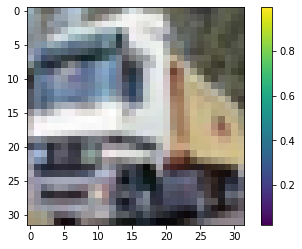

In [ ]:
# Verify normalization //checking the colour bar scale

plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
# Preview 
y_train[1]

array([9], dtype=uint8)

# Step-3: CNN Model Building

In [ ]:
# Defins an object // Create an instance // Initializing CNN

model = tf.keras.models.Sequential()

In [ ]:
 # Adding 1st CNN Layer
"""
1. Filters (kernel) = 32
2. kernel_size = 3
3. padding = same
4. Activation function = ReLU
5. input_shape = (32,32,3) 
"""
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, padding= "same", activation= "relu",input_shape= [32, 32, 3] ))

In [ ]:
# Adding 2nd CNN layer and maxpool layer
"""
1. Filters (kernel) = 32
2. kernel_size = 3
3. padding = same
4. Activation function = ReLU
"""
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size= 3, padding= "same", activation= "relu"))

# Specify maxpool layer parameters
"""
1. pool_size = 2
2. strides = 2
3. padding = valid
"""
model.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2, padding= "valid"))

In [ ]:
# Adding 3rd CNN layer
"""
1. Filters (kernel) = 64
2. kernel_size = 3
3. padding = same
4. Activation function = ReLU
"""
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= "same", activation= "relu"))

In [ ]:
# Adding 4th CNN layer and maxpool layer
"""
1. Filters (kernel) = 64
2. kernel_size = 3
3. padding = same
4. Activation function = ReLU
"""
model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, padding= "same", activation= "relu"))

# Specify maxpool layer parameters
"""
1. pool_size = 2
2. strides = 2
3. padding = valid
"""
model.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2, padding= "valid"))

In [ ]:
# Adding the dropout layer

model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding the Flattening layer

model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding 1st Dense Layer

model.add(tf.keras.layers.Dense(units= 128, activation= "relu"))

In [ ]:
# Adding 2nd Dense layer = Output Layer

model.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Step-4: Model Training

In [ ]:
# Model Compilation

model.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics= ["sparse_categorical_accuracy"] )

In [ ]:
# Model Training

model.fit(x_train, y_train, batch_size= 10, epochs= 10)

Epoch 1/10
5000/5000 [==============================] - 329s 66ms/step - loss: 1.3625 - sparse_categorical_accuracy: 0.5084
Epoch 2/10
5000/5000 [==============================] - 331s 66ms/step - loss: 0.9945 - sparse_categorical_accuracy: 0.6473
Epoch 3/10
5000/5000 [==============================] - 330s 66ms/step - loss: 0.8581 - sparse_categorical_accuracy: 0.6967
Epoch 4/10
5000/5000 [==============================] - 331s 66ms/step - loss: 0.7723 - sparse_categorical_accuracy: 0.7278
Epoch 5/10
5000/5000 [==============================] - 329s 66ms/step - loss: 0.7113 - sparse_categorical_accuracy: 0.7481
Epoch 6/10
5000/5000 [==============================] - 331s 66ms/step - loss: 0.6593 - sparse_categorical_accuracy: 0.7679
Epoch 7/10
5000/5000 [==============================] - 330s 66ms/step - loss: 0.6215 - sparse_categorical_accuracy: 0.7813
Epoch 8/10
5000/5000 [==============================] - 331s 66ms/step - loss: 0.5812 - sparse_categorical_accuracy: 0.7945
Epoch 9/

# Step-5: Model Evaluation

In [ ]:
test_loss , test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 15s 47ms/step - loss: 0.7647 - sparse_categorical_accuracy: 0.7465


In [ ]:
print("Test Accuracy: {}".format(test_accuracy*100),"%")

Test Accuracy: 74.6500015258789 %


## Model Prediction

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 14s 46ms/step


In [ ]:
print(y_pred_classes[101]), print(y_test[101])

5
[5]


(None, None)

In [ ]:
# Preview

y_test 

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_pred_classes

array([3, 8, 8, ..., 5, 4, 7])

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, recall_score, precision_score

In [ ]:
# Convert continuous predictions to discrete class labels
y_pred_classes = np.argmax(y_pred, axis=1)
conf_m = confusion_matrix(y_test, y_pred_classes)
acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average= "weighted")
r2 = r2_score(y_test, y_pred_classes)
rs = recall_score(y_test, y_pred_classes, average= "weighted")
ps = precision_score(y_test, y_pred_classes, average= "weighted")

print("acc: {} \nf1: {}  \nr2: {} \nrs: {} \nps: {}".format(acc*100, f1*100, r2*100, rs*100, ps*100))

acc: 74.65 
f1: 74.50136291353871  
r2: 47.88969696969697 
rs: 74.65 
ps: 74.95370736463317


In [ ]:
conf_m = confusion_matrix(y_test, y_pred_classes)
print(conf_m)

[[784  10  28  31  20   3   5   5  80  34]
 [ 19 827   2   6   2   3   6   3  31 101]
 [ 92   3 537  62 120  73  55  28  21   9]
 [ 23   3  41 590  77 147  46  45  17  11]
 [ 19   3  29  63 761  29  22  56  14   4]
 [ 15   3  29 183  53 618  18  58  13  10]
 [  7   4  19  63  51  26 799   9  19   3]
 [ 23   1  15  39  64  36   8 796   5  13]
 [ 47  15   4  12   5   2   2   6 884  23]
 [ 29  45   3  11   5   4   2   7  25 869]]


Text(0.5, 15.0, 'Predicted label')

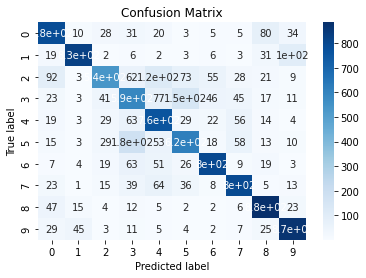

In [ ]:
# plot the matrix
sns.heatmap(conf_m, annot=True, cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')